<a href="https://colab.research.google.com/github/NataliaMak20/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-course/sklearn-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sklearn
import numpy as np
import sklearn.datasets as datasets 

In [4]:
data = datasets.load_digits()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
len(data.images)

1797

4


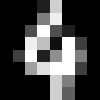

In [7]:
from PIL import Image

i = 100
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)

In [8]:
np.max(data.images)

16.0

In [9]:
data.images.shape

(1797, 8, 8)

In [10]:
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
flat_dataset = data.images.reshape((len(data.images), -1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [13]:
X_train.shape

(1437, 64)

In [14]:
X_test.shape

(360, 64)

9


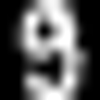

In [15]:
print(y_test[100])
Image.fromarray((X_test[100].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100))

In [16]:
from sklearn import svm

In [17]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [18]:
model.predict(X_test[0:10])

array([8, 7, 9, 9, 9, 5, 5, 3, 8, 2])

In [19]:
y_test[0:10]

array([8, 7, 9, 9, 9, 5, 5, 3, 8, 2])

In [20]:
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [21]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        29
           4       0.97      1.00      0.99        37
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        45

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



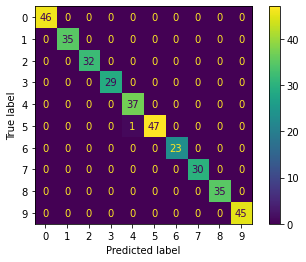

In [22]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

In [23]:
import pickle

In [24]:
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)

In [25]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [26]:
mymodel.predict(X_test[:10]) == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

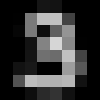

In [33]:
im = Image.open("num-3.jpg").resize((8,8))
im.resize((100,100), resample=Image.NEAREST)

In [34]:
np_im = np.array(im)

In [35]:
preprocessed_img = np_im.astype(np.float32) / 255 * 16

In [36]:
preprocessed_img.flatten()[None].shape

(1, 64)

In [37]:
model.predict(preprocessed_img.flatten()[None])

array([3])

In [38]:
np.where(y_test == 1)

(array([ 16,  21,  22,  26,  31,  50,  61,  64,  69,  81,  85, 101, 104,
        105, 128, 141, 161, 191, 219, 223, 228, 230, 241, 253, 257, 295,
        303, 305, 315, 316, 323, 331, 343, 346, 348]),)

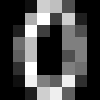

In [39]:
Image.fromarray((X_test[14].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100), resample=Image.NEAREST)